In [53]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [25]:
df = pd.read_csv("bfi.csv")
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [26]:
df.drop(['gender', 'education', 'age', 'Unnamed: 0'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [27]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


## Adequacy Test

- 요인분석 전, "factorability"를 측정해야함
- factorability란 "데이터셋 안에서 요인들을 찾을 수 있을까?"의 의미
- 두 가지 측정 방법이 존재
    - Bartlett's Test
    - KMO(Kaiser-Meyer-Olkin) Test

### Bartlett's (sphericity) test

- 변수 간의 상관관계가 있는 지를 확인하는 검정 방법이며 주로 요인분석(Factor Analysis)나 주성분분석(Principal Component Analysis)의 적용 여부를 판단하는 데 사용
- 만약 테스트 결과, 통계적으로 특정할만한 수치를 찾지 못한다면 요인분석을 시행하면 안됨

In [30]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869232, 0.0)

`p_value : 0`, 해당 테스트는 통계적으로 유의하며, 관측된 상관행렬은 단위행렬이 아님을 암시한다

### KMO test

- 관측된 각 변수와 전체모델에 대한 적절성 결정
- KMO는 관측된 모든 변수 간의 분산비율을 추정
- Bartlett와 달리 p값이 없기 때문에 판단의 기준이 따로 있음
- 0.6미만의 KMO값은 부적절한 것으로 간주되며 0.8이상이면 우수하다고 할 수 있다
- 단, KMO test를 하기위해 변수가 최소한 3개 이상이어야 한다

In [32]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)

In [33]:
kmo_model

0.848539722194922

`KMO : 0.84` , 0.84로 훌륭한 수치이며 계획한 요인분석을 진행해도 됨을 암시한다

### Choosing the number of factors

- 요인들의 수를 선택하기위해, `Kaiser criterion` 과 `scree plot`을 사용하자
- 둘다 eigenvalue 기반임

In [42]:
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')
fa.fit(df)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

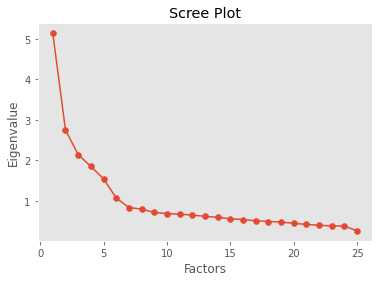

In [58]:
# scree plot 

plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
                           

### 요인분석 실행

In [55]:
fa = FactorAnalyzer(n_factors = 6, rotation = 'varimax')
fa.fit(df)

factor_df = pd.DataFrame(fa.loadings_, index = df.columns)
factor_df

,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


<AxesSubplot:>

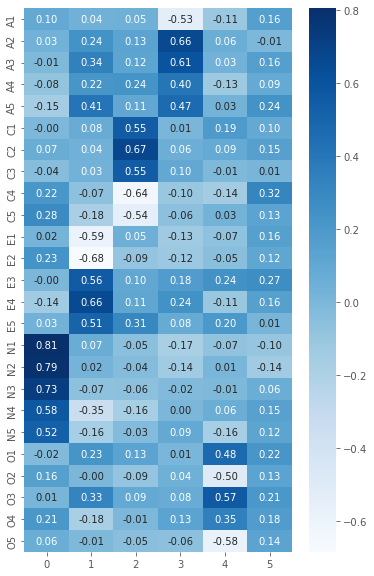

In [56]:
plt.figure(figsize = (6, 10))

sns.heatmap(factor_df, cmap = 'Blues', annot = True, fmt = '.2f')

- `Factor 0`은 N1, N2, N3, N4, N5 에서 높은 loadings값이 나타난다 (Neuroticism)
- `Factor 1` 은 E1, E2, E3, E4, E5 에서 높은 loadings값이 나타난다 (Extraversion)
- `Factor 2` 은 C1, C2, C3, C4, C5 에서 높은 loadings값이 나타난다 (Conscientiousness)
- `Factor 3` 은 A1, A2, A3, A4, A5에서 높은 loadings값이 나타난다 (Agreeableness)
- `Factor 4` 은 O1, O2, O3, O4, O5에서 높은 loadings값이 나타난다 (Openness)
- `Factor 5` 는 어떠한 변수에서도 높은 값이 발견되지 않으며 쉽게 해석가능해 보이지 않는다. 

5가지 요인을 선택하기에 좋은 근거로 보여진다


In [50]:
# 5개의 요인을 사용해 요인분석을 수행
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(df)

factor_df = pd.DataFrame(fa.loadings_, index = df.columns)
factor_df

,0,1,2,3,4
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


<AxesSubplot:>

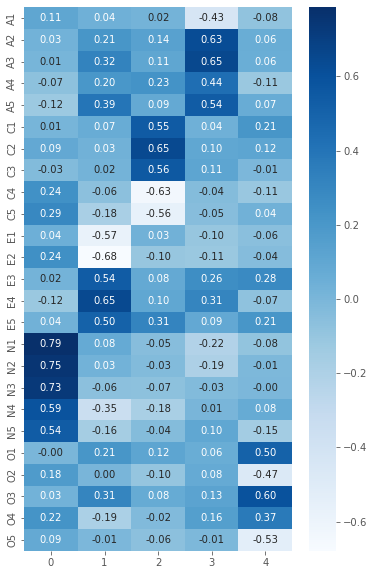

In [54]:
plt.figure(figsize = (6, 10))

# plot
sns.heatmap(factor_df, cmap = 'Blues', annot = True, fmt = '.2f')

In [52]:
# 변수의 각 요인들 
fa.get_factor_variance()

factor_variance = pd.DataFrame(fa.get_factor_variance(), index = ['SS Loadings', 'Proportion Var', 'Cumulative Var'])
factor_variance

,0,1,2,3,4
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619


### Cronbach's Alpha 확인

In [59]:
# 크론바흐 알파계수
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis = 0, ddof = 1)
    tscores = itemscores.sum(axis = 1)
    nitems = itemscores.shape[1]
    
    return (nitems / (nitems - 1)) * (1 - (itemvars.sum() / tscores.var(ddof = 1)))

In [60]:
factors = ['A', 'C', 'E', 'N', 'O']
factors_items_dict = {}

for factor in factors:
    factors_items_dict[factor] = [x for x in df.columns if x[0] == factor]
    
factors_items_dict

{'A': ['A1', 'A2', 'A3', 'A4', 'A5'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5'],
 'N': ['N1', 'N2', 'N3', 'N4', 'N5'],
 'O': ['O1', 'O2', 'O3', 'O4', 'O5']}

In [63]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(df[value]))
    print()


A
0.4437533019387808

C
-0.31628341382240494

E
-0.6552429584732491

N
0.8169468842774033

O
-0.176098107937655



- `N`, `A` 가 높은것 확인